In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.chdir('..')
%matplotlib inline

`tools\optimization.py`

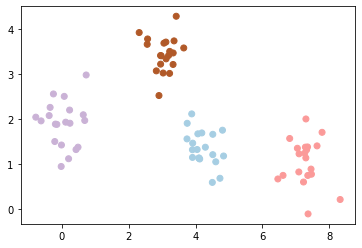

In [2]:
from tools.datasets import DataGenerator

data_generator = DataGenerator(p=4, sep=6, seed=1)
data, label = data_generator.get_data()
data_generator.plot()

优化器父类
```
class Minimizer:
    __init__:
        function[function]: 优化目标函数
        init[np.array(nd x 1)]: 初始点
        tol[float]: 终止条件
        max_iter[int]: 最多迭代次数

    Attributes
        _function:
        _init:
        _tol:
        _solution[array(init.shape)]: 优化解，和起始点同shape
        _duration[float]: 计算时间
        _iter[int]: 迭代次数
        _path[list<np.array>]: 优化路径
        _d_path[list]: 梯度范数路径

    Method
        get_result: 获取结果

        _apply: 实施优化
        _line_search: 步长策略
```
其他优化器继承`Minimizer`类，编写方式参照示例`tools.optimization.ExampleMinimizer`。

**示例：**<br>
`tools.optimization.ExampleMinimizer`
- `function`, `init`, `tol`, `max_iter`为通用参数
- `param1`,`param2`为该优化器特有参数

In [3]:
from tools.optimization import  AGM
from scipy.sparse import csc_matrix
from tools.functions import SSE, Huber


lambda_=2
f = SSE(data)/2 + lambda_*Huber(delta=1, data_shape=data.shape)
init = data
tol = 10**(-3)
max_iter = 1000
param={
    'use_sgd': False,
    'param1': 1,
    'param2': 2    
}
example_minimizer=AGM(function=f,init=init,tol=tol,max_iter=max_iter,**param)

In [4]:
result=example_minimizer.get_result()
result.keys()

Applying: AGM
iter:35	d_norm:0.0004	obj:316.0041695
Complete!


dict_keys(['solution', 'duration', 'iter', 'path'])

In [5]:
solution=result['solution']
solution.shape

torch.Size([2, 80])